# Predicting Breast Cancer from Biopsied Breast Cells

### Author: M. A. Barrios / Version: 1 / Date: July 6, 2017

__________________________________________________________________________________________________________________

This analysis uses biopsied breast cells that are labeled as benign or malignant, along with the attributes measured for each cell, to develop a model to predict whether a biopsied cell is benign or maligmant.

The dataset consists of 699 cells with the following features:
1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

Data obtained from UC Irvine Machine Learning Repository; Breast cancer data from Wisconsin  
__________________________________________________________________________________________________________________

## Load data and visualize

Import pacakages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set(style="white", color_codes=True, font_scale=1.8)
import os

inline plot magic

In [2]:
%matplotlib inline

Import breat cancer data, label columns

In [3]:
os.chdir('/Users/mariaalejandrabarrios/Documents/0_DataScience/0_Insight/Data Challenge/')
dat=pd.read_csv('Breast_Cancer.csv', header=None,index_col=False,
                 names=['id', 'clump_thk','uniformity_sz', 'uniformity_shape','adhesion', 
                        'sngl_Epthl_sz','bare_nucl','chromatin','nucleoli', 'mitosis', 'diagns'])
dat.head()

,id,clump_thk,uniformity_sz,uniformity_shape,adhesion,sngl_Epthl_sz,bare_nucl,chromatin,nucleoli,mitosis,diagns
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Won't be using id; will only be using attribute data ; delete id column

In [182]:
dat=dat.drop(['id'],1)
dat.head()

,clump_thk,uniformity_sz,uniformity_shape,adhesion,sngl_Epthl_sz,bare_nucl,chromatin,nucleoli,mitosis,diagns
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
len(dat)

699

In [5]:
dat=dat.dropna()

Data statistics 

In [6]:
dat.describe()

,id,clump_thk,uniformity_sz,uniformity_shape,adhesion,sngl_Epthl_sz,chromatin,nucleoli,mitosis,diagns
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [124]:
dat['diagns'].unique()

array([2, 4])

Data statistics grouped by cell class ( benign or malignant)

In [7]:
dat.groupby('diagns').describe()

adhesion   chromatin   clump_thk            id     mitosis  \
diagns                                                                       
2      count  458.000000  458.000000  458.000000  4.580000e+02  458.000000   
       mean     1.364629    2.100437    2.956332  1.107591e+06    1.063319   
       std      0.996830    1.080339    1.674318  7.234318e+05    0.501995   
       min      1.000000    1.000000    1.000000  6.163400e+04    1.000000   
       25%      1.000000    1.000000    1.000000  1.002614e+06    1.000000   
       50%      1.000000    2.000000    3.000000  1.180170e+06    1.000000   
       75%      1.000000    3.000000    4.000000  1.256870e+06    1.000000   
       max     10.000000    7.000000    8.000000  1.345435e+07    8.000000   
4      count  241.000000  241.000000  241.000000  2.410000e+02  241.000000   
       mean     5.547718    5.979253    7.195021  1.003505e+06    2.589212   
       std      3.210465    2.273852    2.428849  3.222323e+05    2.557939   
       min      1.000000    1.000000    1.000000  6.337500e+04    1.000000   
       25%      3.000000    4.000000    5.000000  8.322260e+05    1.000000   
       50%      5.000000    7.000000    8.000000  1.126417e+06    1.000000   
       75%      8.000000    7.000000   10.000000  1.221863e+06    3.000000   
       max     10.000000   10.000000   10.000000  1.371026e+06   10.000000   

                nucleoli  sngl_Epthl_sz  uniformity_shape  uniformity_sz  
diagns                                                                    
2      count  458.000000     458.000000        458.000000     458.000000  
       mean     1.290393       2.120087          1.443231       1.325328  
       std      1.058856       0.917130          0.997836       0.907694  
       min      1.000000       1.000000          1.000000       1.000000  
       25%      1.000000       2.000000          1.000000       1.000000  
       50%      1.000000       2.000000          1.000000       1.000000  
       75%      1.000000       2.000000          1.000000       1.000000  
       max      9.000000      10.000000          8.000000       9.000000  
4      count  241.000000     241.000000        241.000000     241.000000  
       mean     5.863071       5.298755          6.560166       6.572614  
       std      3.350672       2.451606          2.562045       2.719512  
       min      1.000000       1.000000          1.000000       1.000000  
       25%      3.000000       3.000000          4.000000       4.000000  
       50%      6.000000       5.000000          6.000000       6.000000  
       75%     10.000000       6.000000          9.000000      10.000000  
       max     10.000000      10.000000         10.000000      10.000000

Let's just look at mean values in more detail ....

In [8]:
dat.groupby('diagns').mean()

,id,clump_thk,uniformity_sz,uniformity_shape,adhesion,sngl_Epthl_sz,chromatin,nucleoli,mitosis
diagns,,,,,,,,,
2,1.107591e+06,2.956332,1.325328,1.443231,1.364629,2.120087,2.100437,1.290393,1.063319
4,1.003505e+06,7.195021,6.572614,6.560166,5.547718,5.298755,5.979253,5.863071,2.589212


In [9]:
dat.groupby('diagns').corr()

adhesion  chromatin  clump_thk        id   mitosis  \
diagns                                                                        
2      adhesion          1.000000   0.195524   0.267841 -0.012839  0.054336   
       chromatin         0.195524   1.000000   0.124612 -0.014758 -0.044031   
       clump_thk         0.267841   0.124612   1.000000  0.018210 -0.038358   
       id               -0.012839  -0.014758   0.018210  1.000000 -0.018880   
       mitosis           0.054336  -0.044031  -0.038358 -0.018880  1.000000   
       nucleoli          0.386647   0.385716   0.221931 -0.041301  0.047665   
       sngl_Epthl_sz     0.378041   0.202023   0.177273 -0.066750 -0.016552   
       uniformity_shape  0.314543   0.238734   0.302374  0.034232 -0.003729   
       uniformity_sz     0.376469   0.308016   0.291572 -0.031158  0.041134   
4      adhesion          1.000000   0.332037  -0.146807 -0.027426  0.206616   
       chromatin         0.332037   1.000000  -0.017371  0.033854  0.057987   
       clump_thk        -0.146807  -0.017371   1.000000 -0.039891  0.116229   
       id               -0.027426   0.033854  -0.039891  1.000000  0.012286   
       mitosis           0.206616   0.057987   0.116229  0.012286  1.000000   
       nucleoli          0.180141   0.250645  -0.012577  0.081522  0.219954   
       sngl_Epthl_sz     0.205699   0.211894   0.013266  0.153274  0.337248   
       uniformity_shape  0.264962   0.336726   0.112270  0.098858  0.209464   
       uniformity_sz     0.319466   0.385999   0.096569  0.194531  0.241200   

                         nucleoli  sngl_Epthl_sz  uniformity_shape  \
diagns                                                               
2      adhesion          0.386647       0.378041          0.314543   
       chromatin         0.385716       0.202023          0.238734   
       clump_thk         0.221931       0.177273          0.302374   
       id               -0.041301      -0.066750          0.034232   
       mitosis           0.047665      -0.016552         -0.003729   
       nucleoli          1.000000       0.511559          0.451590   
       sngl_Epthl_sz     0.511559       1.000000          0.393625   
       uniformity_shape  0.451590       0.393625          1.000000   
       uniformity_sz     0.568565       0.468160          0.710185   
4      adhesion          0.180141       0.205699          0.264962   
       chromatin         0.250645       0.211894          0.336726   
       clump_thk        -0.012577       0.013266          0.112270   
       id                0.081522       0.153274          0.098858   
       mitosis           0.219954       0.337248          0.209464   
       nucleoli          1.000000       0.226154          0.312812   
       sngl_Epthl_sz     0.226154       1.000000          0.379887   
       uniformity_shape  0.312812       0.379887          1.000000   
       uniformity_sz     0.303118       0.458573          0.721621   

                         uniformity_sz  
diagns                                  
2      adhesion               0.376469  
       chromatin              0.308016  
       clump_thk              0.291572  
       id                    -0.031158  
       mitosis                0.041134  
       nucleoli               0.568565  
       sngl_Epthl_sz          0.468160  
       uniformity_shape       0.710185  
       uniformity_sz          1.000000  
4      adhesion               0.319466  
       chromatin              0.385999  
       clump_thk              0.096569  
       id                     0.194531  
       mitosis                0.241200  
       nucleoli               0.303118  
       sngl_Epthl_sz          0.458573  
       uniformity_shape       0.721621  
       uniformity_sz          1.000000

In [32]:
458/(241+458)

0.6552217453505007

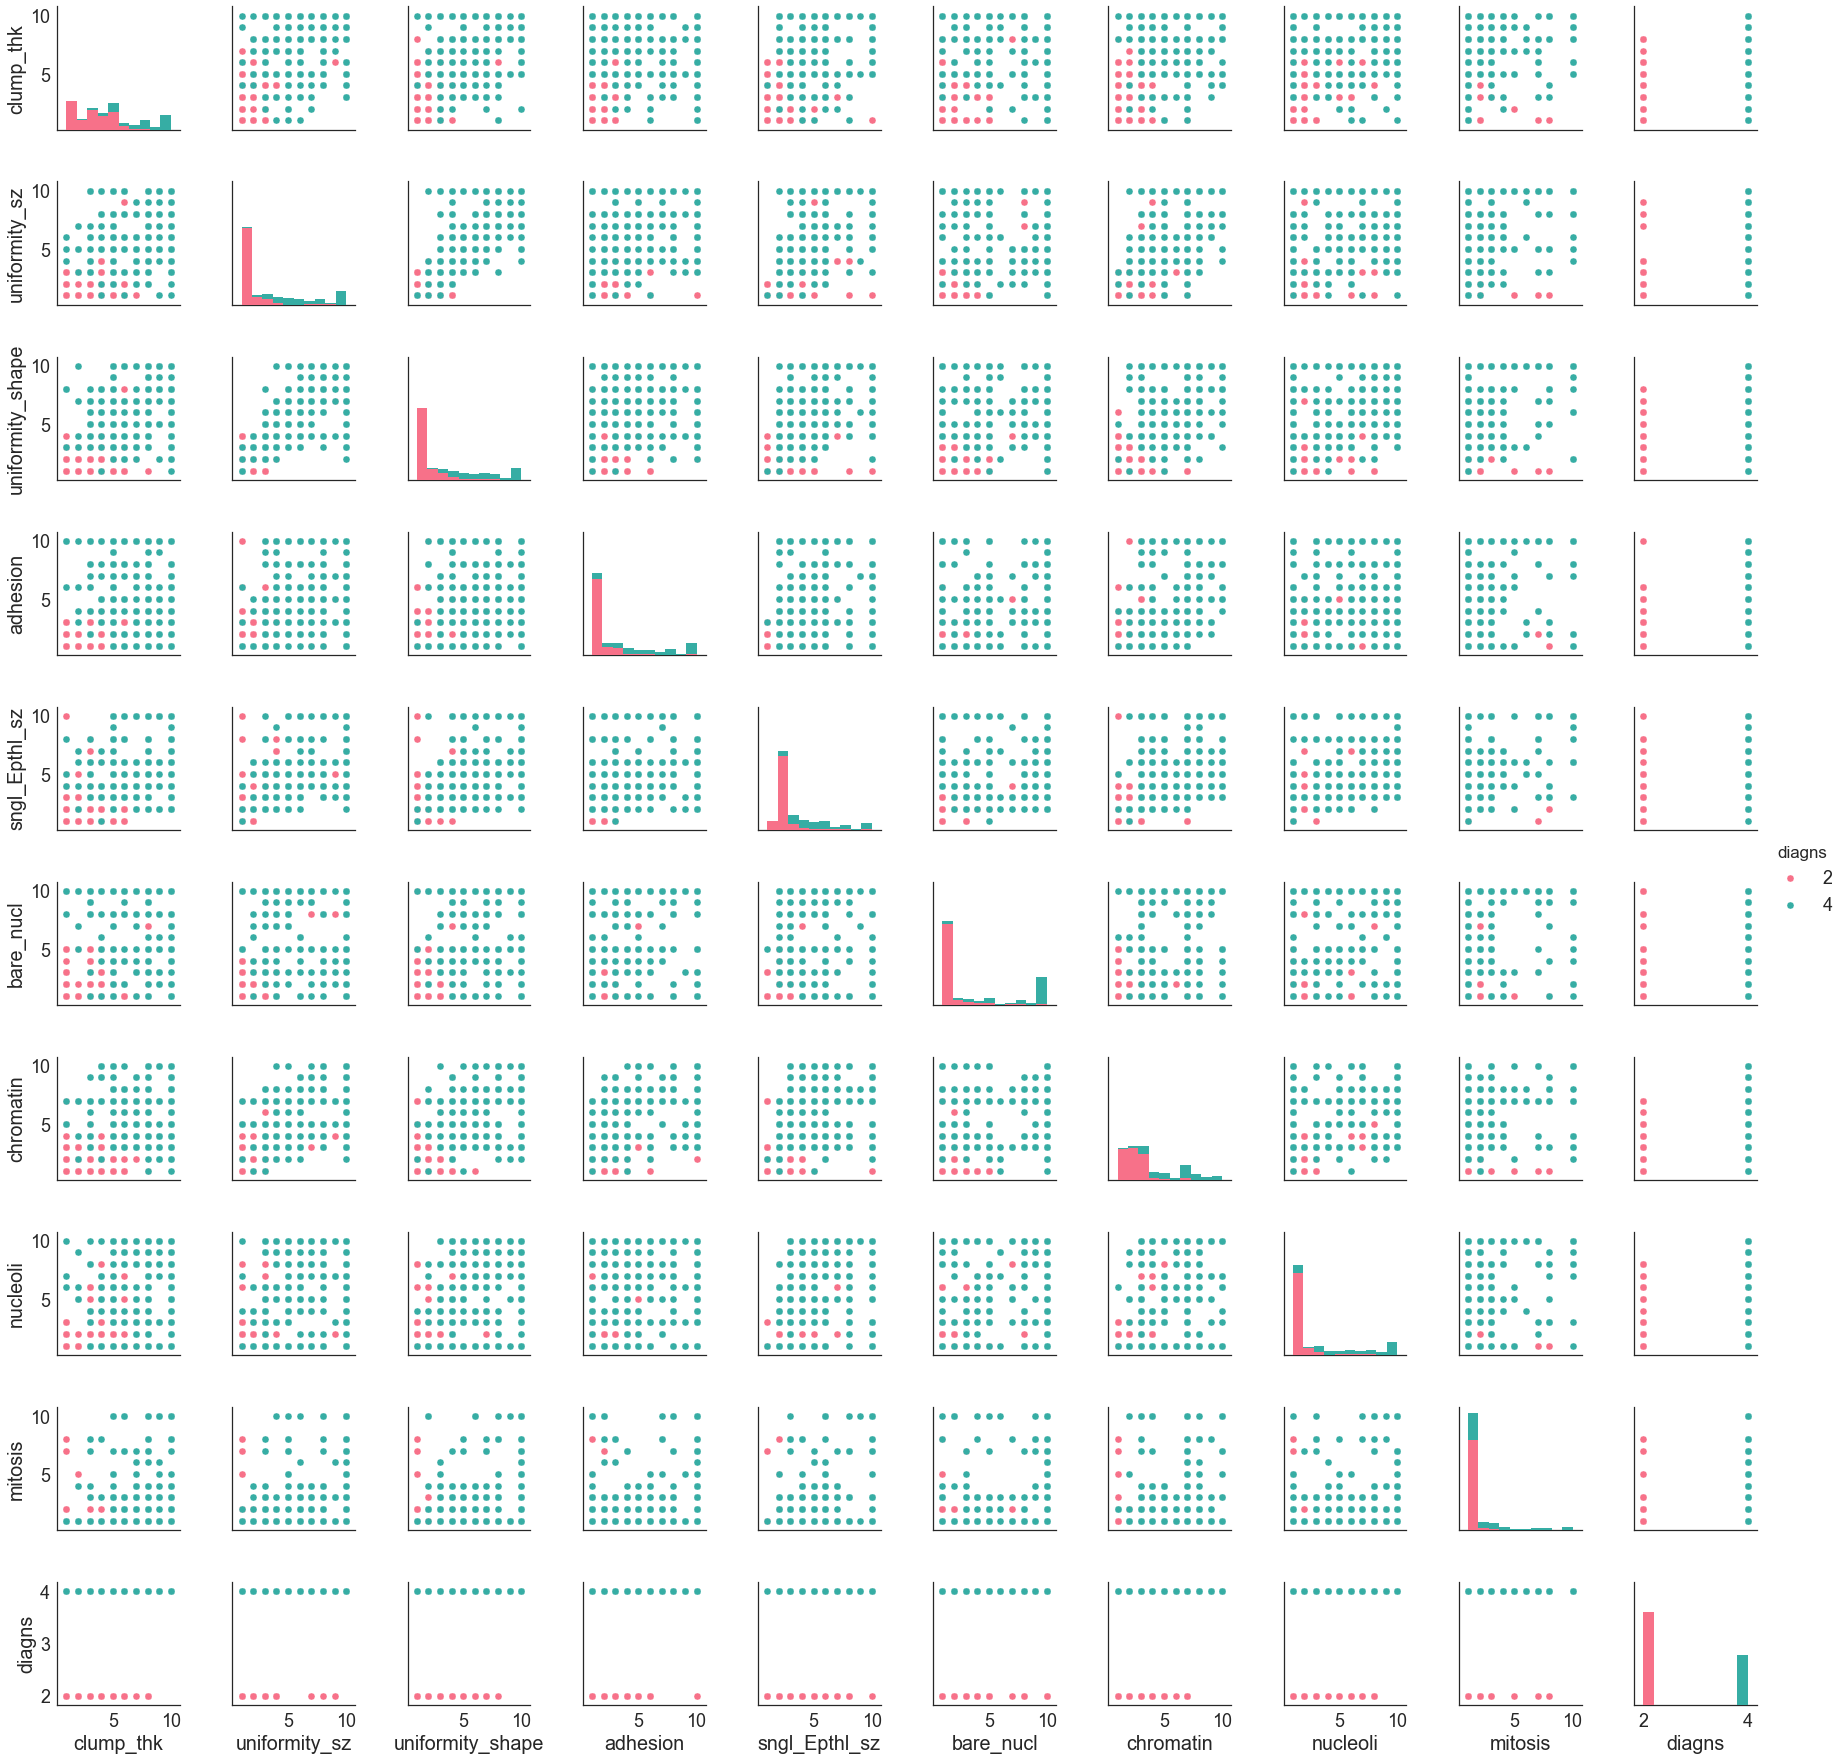

In [144]:
sns.pairplot(dat, hue='diagns', palette='husl')

discovered Bare Nuclei has fields with '?' , change this to nan, 
convert strings to floats, and drop nan to have clean set of data

In [10]:
dat['bare_nucl']=dat.bare_nucl.replace('?', np.nan)
dat['bare_nucl']=dat.bare_nucl.replace(['1','2','3','4','5','6','7','8','9','10'], 
                                       np.arange(10)+1)
dat=dat.dropna()
len(dat)

683

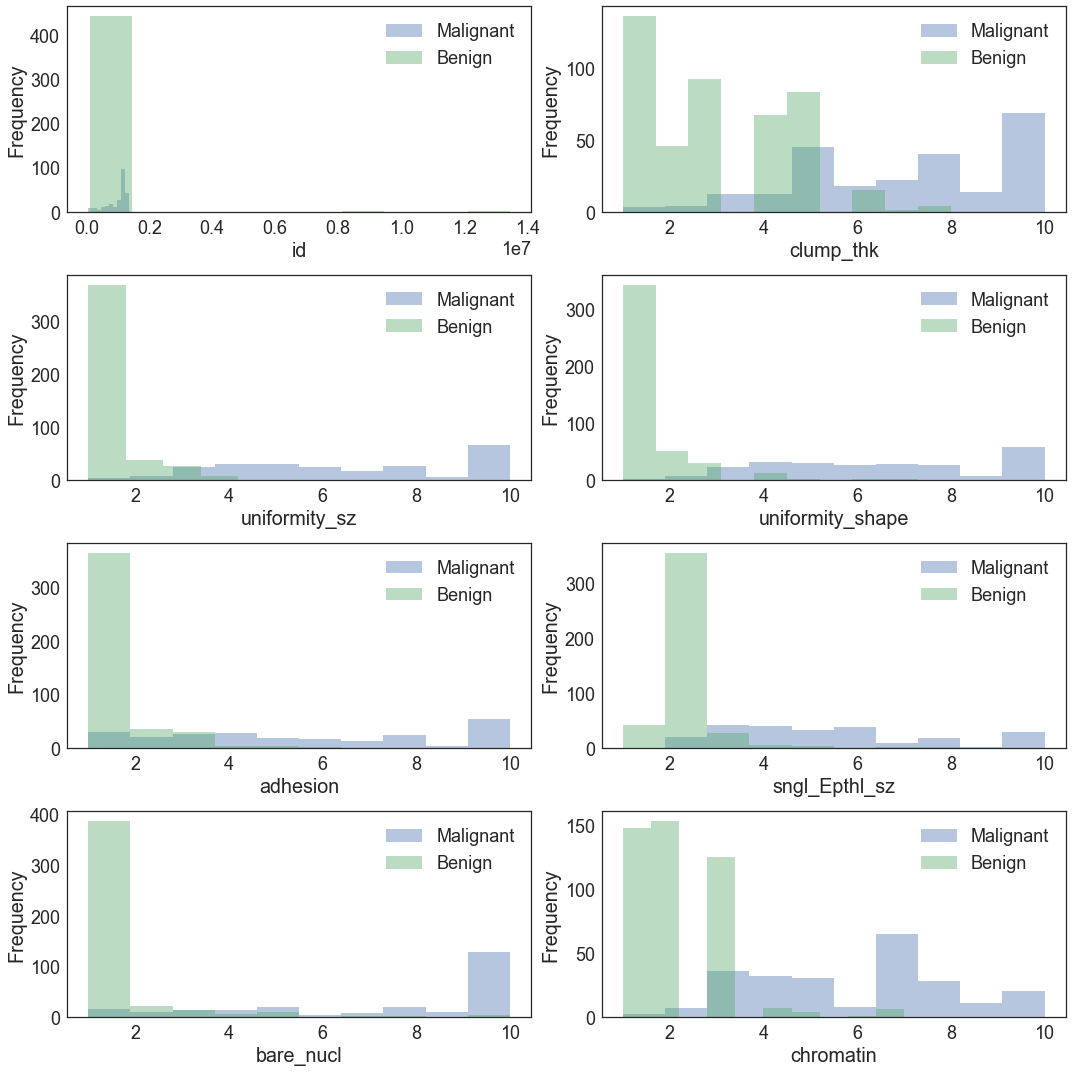

In [11]:
nbins=10
colnames=list(dat.columns[0:9]) # list of col names to plot

f, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
axs=axs.ravel() 
for i,ax in enumerate(axs):
    ax.figure
    ax.hist(dat[colnames[i]][dat.diagns==4], bins=nbins, alpha=0.4, label='Malignant')
    ax.hist(dat[colnames[i]][dat.diagns==2], bins=nbins, alpha=0.4, label='Benign')
    ax.legend(loc='upper right')
    ax.set_xlabel(colnames[i])
    ax.set_ylabel('Frequency')
plt.tight_layout()

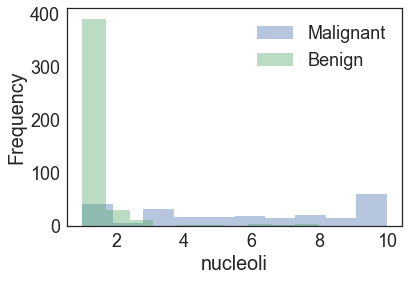

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
i=8
ax.hist(dat[colnames[i]][dat.diagns==4], bins=nbins, alpha=0.4, label='Malignant')
ax.hist(dat[colnames[i]][dat.diagns==2], bins=nbins, alpha=0.4, label='Benign')
ax.legend(loc='upper right')
ax.set_xlabel(colnames[i])
ax.set_ylabel('Frequency')

Is data unbalanced?

In [13]:
B=dat.diagns[dat.diagns == 2].count()/dat.diagns.count()
M=dat.diagns[dat.diagns == 4].count()/dat.diagns.count()
print('Benign (%): '+str(round(B*100)))
print('Malignant (%): '+str(round(M*100)))

Benign (%): 65.0
Malignant (%): 35.0


## Train model

import packages for model fitting

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

In [15]:
# function that reads in predictor, target, and model to use. 
# applies model, outputs fit metrics 
def Model_fit_predict(TrainIn, TestIn, predictor, target, model, flag):
    # define data to be used as prediction parameters, and data to be defined as target outcome
    x_train=TrainIn[predictor]
    
    if flag == 1:
        y_train=np.array(TrainIn[target]).ravel()
    else:
        y_train=TrainIn[target]
    
#print(y_train)
    
    model.fit(x_train, y_train)
    
    
    # predict output
    x_test=TestIn[predictor]
    predicted=model.predict(x_test)
    
    #print(predicted)
    
    # calcualte model accuracy and output score
    accrcy=metrics.accuracy_score( TestIn[target], predicted)
    print("Model Accuracy: %s" % "{0:.3}".format(accrcy))
    
    precision=metrics.precision_score(TestIn[target], predicted)
    print("Model Precision: %s" % "{0:.3}".format(precision))
        
    rec=metrics.recall_score(TestIn[target], predicted)
    print("Model Recall: %s" % "{0:.3}".format(rec))
    
    f1_scr= metrics.f1_score(TestIn[target], predicted)
    print("Model F1-score: %s" % "{0:.3}".format(f1_scr))
    
    
    
    # confusion matrix
    conf_matrix=metrics.confusion_matrix(TestIn[target], predicted)
    conf_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    conf_m=sns.heatmap(conf_norm, yticklabels=['Benign','Malignant'], xticklabels=['Benign','Malignant'], annot=True, 
                       annot_kws={"size": 18}) 
    
    # implement k-fold cross validation to test if model is overfitting data
    # split data into K random folds, test each fold to get error ; then average error 
    # of all folds 
    # (len(data)-->> num rows, num folds )
    cv= cross_validation.KFold(TrainIn.shape[0], n_folds=5)
    Errors=[]
    for cvtrain, cvtest in cv:
        # define training data based on indices from cv
        Xtrain_cv=(TrainIn[predictor].iloc[cvtrain,:])
        if flag==1:
            Ytrain_cv=np.array((TrainIn[target].iloc[cvtrain])).ravel()
        else:
            Ytrain_cv=(TrainIn[target].iloc[cvtrain])
        #print("%s %s" % (cvtrain, cvtest))

        model.fit(Xtrain_cv, Ytrain_cv)

        # now use test data to calcualte model errors 
        Xtest_cv=(TrainIn[predictor].iloc[cvtest, :])
        Ytest_cv=(TrainIn[target].iloc[cvtest])

        # append score for each fold
        Errors.append(model.score(Xtest_cv, Ytest_cv))

    # calculate mean (estimate emodel bias) and 
    # standard deviation (estimate model variance) from above results 
    print('')
    print("Cross Validation (mean score, variance): %5.3f, %5.3f" % (np.average(Errors), np.std(Errors)))
    
    # Importance of variables
    VarImportance = pd.Series(model.feature_importances_, index=predictor).sort_values(ascending=False)
    
    row_pos=np.arange(len(VarImportance))
    # inner tree variability
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.barh(row_pos, VarImportance,color=(0,0.4,1), xerr=std, ecolor='r')
    ax.set_yticks(row_pos)
    ax.set_yticklabels(VarImportance.index)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Feature Ranking')
    ax.set_title('Random Forest Importance of Variables')
    return[accrcy , np.average(Errors), np.std(Errors),  conf_m]

In [16]:
# assumes this is np array, where first col is target_col, everything else is predictor_col
def Model_fit_predict_SMOTE(x_train,y_train, TestIn,cols,trgt, model):
    
    # define data to be used as prediction parameters, and data to be defined as target outcome
#     x_train = TrainIn[:,1:len(TrainIn[0,:])]
#     y_train = TrainIn[:,0]
    
    model.fit(x_train, y_train)
    
    
    # predict output
    x_test = TestIn[cols]
    predicted = model.predict(x_test)
    
    # calcualte model accuracy and output score
    accrcy=metrics.accuracy_score(TestIn[trgt],predicted )
    precision=metrics.precision_score(TestIn[trgt], predicted)
    f1_scr= metrics.f1_score(TestIn[trgt], predicted)
    rec=metrics.recall_score(TestIn[trgt], predicted)
    
    print("Model F1-score: %s" % "{0:.3}".format(f1_scr))
    print("Model Accuracy: %s" % "{0:.3}".format(accrcy))
    print("Model Precision: %s" % "{0:.3}".format(precision))
    print("Model Recall: %s" % "{0:.3}".format(rec))
    
    
    # confusion matrix
    conf_matrix=metrics.confusion_matrix(TestIn[trgt], predicted)
    conf_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    conf_m=sns.heatmap(conf_norm, yticklabels=['Not Matched','Matched'], xticklabels=['Not Matched','Matched'], annot=True, 
                       annot_kws={"size": 18}) 
    
    
    # implement k-fold cross validation to test if model is overfitting data
    # split data into K random folds, test each fold to get error ; then average error 
    # of all folds 
    # (len(data)-->> num rows, num folds )
    
    x_train=np.asarray(x_train)
    y_train=np.asarray(y_train)

    # join both arrays, add result into first column
    TrainIn=np.insert(x_train, 0,  y_train, axis=1) 
    
    cv= cross_validation.KFold(TrainIn.shape[0], n_folds=6)
    
    Errors=[]
    for cvtrain, cvtest in cv:
        # define training data based on indices from cv
        Xtrain_cv = TrainIn[cvtrain,1:len(TrainIn[0,:])]
        Ytrain_cv = TrainIn[cvtrain,0]
        
        model.fit(Xtrain_cv, Ytrain_cv)

        # now use test data to calcualte model errors 
        Xtest_cv = TrainIn[cvtest,1:len(TrainIn[0,:])]
        Ytest_cv = TrainIn[cvtest,0]

        # append score for each fold
        Errors.append(model.score(Xtest_cv, Ytest_cv))

    # calculate mean (estimate emodel bias) and 
    # standard deviation (estimate model variance) from above results 
    print('')
    print("Cross Validation (mean score, variance): %5.3f, %5.3f" % (np.average(Errors), np.std(Errors)))
    

    # Importance of variables
    VarImportance = pd.Series(model.feature_importances_, index=colsIn[1:]).sort_values(ascending=False)

    # inner tree variability
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

    row_pos=np.arange(len(VarImportance))

    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.barh(row_pos, VarImportance, xerr=std, color=(0,0.4,1), ecolor='r')
    ax.set_yticks(row_pos)
    ax.set_yticklabels(VarImportance.index, fontname="Arial", fontsize=15.5)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Feature Ranking', fontname="Arial", fontsize=14.5)
    ax.set_title('Random Forest Importance of Variables', fontname="Arial", fontsize=16)
    
    return[accrcy , np.average(Errors), np.std(Errors), conf_m]

### Random Forest Model

split data into training and test

In [17]:
dat['diagns'] = dat.diagns.replace([2,4],[0,1]) # binirize class 

In [18]:
d_train, d_test=train_test_split(dat, test_size=0.3, random_state=42)

Random Forest model, using all attributes as predictors, estimators = 100

Model Accuracy: 0.956
Model Precision: 0.973
Model Recall: 0.91
Model F1-score: 0.94

Cross Validation (mean score, variance): 0.964, 0.017


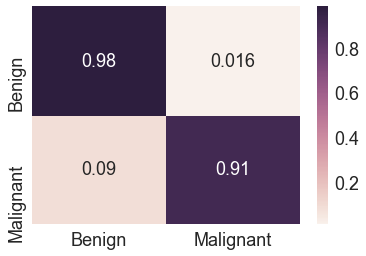

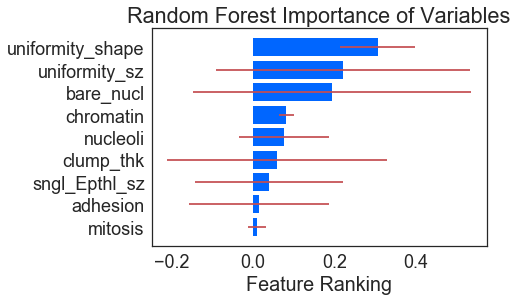

In [19]:
trgt_var=['diagns']
prdctr_vars=['clump_thk', 'uniformity_sz', 'uniformity_shape', 'adhesion',
       'sngl_Epthl_sz', 'bare_nucl', 'chromatin', 'nucleoli', 'mitosis'] # choose all attributes as predictors

model= RandomForestClassifier(n_estimators=100, class_weight='balanced')
VarsOut=Model_fit_predict(d_train, d_test, prdctr_vars, trgt_var, model,1)

increasing number of estimators (from 100 to 900) doesn't change things much; change in ranking between top two parameters, but metrics very similar still 

Model Accuracy: 0.956
Model Precision: 0.973
Model Recall: 0.91
Model F1-score: 0.94

Cross Validation (mean score, variance): 0.964, 0.016


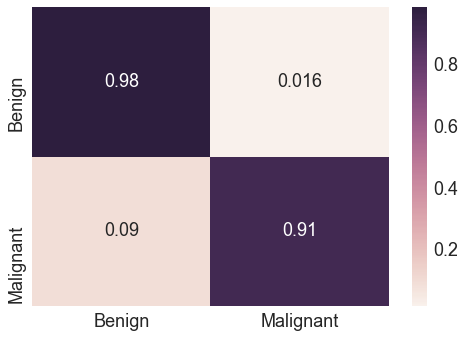

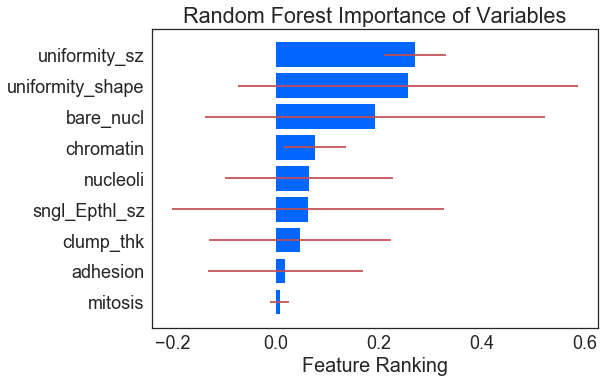

In [189]:
trgt_var=['diagns']
prdctr_vars=['clump_thk', 'uniformity_sz', 'uniformity_shape', 'adhesion',
       'sngl_Epthl_sz', 'bare_nucl', 'chromatin', 'nucleoli', 'mitosis'] # choose all attributes as predictors

model= RandomForestClassifier(n_estimators=900, class_weight='balanced')
VarsOut=Model_fit_predict(d_train, d_test, prdctr_vars, trgt_var, model,1)

Changing min_sample_leaf : slight improvement in recall for Malignant, at the expense of increase of false positives and false negatives... probably don't want to do this since you also want to minimize mis-diagnosis.

Model Accuracy: 0.976
Model Precision: 0.962
Model Recall: 0.974
Model F1-score: 0.968

Cross Validation (mean score, variance): 0.969, 0.011


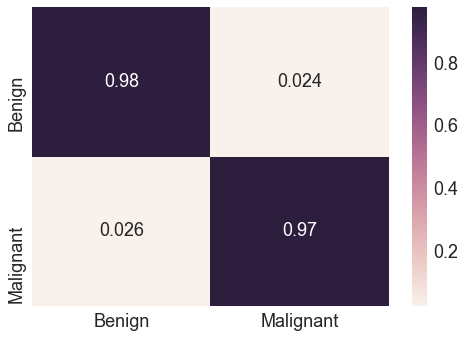

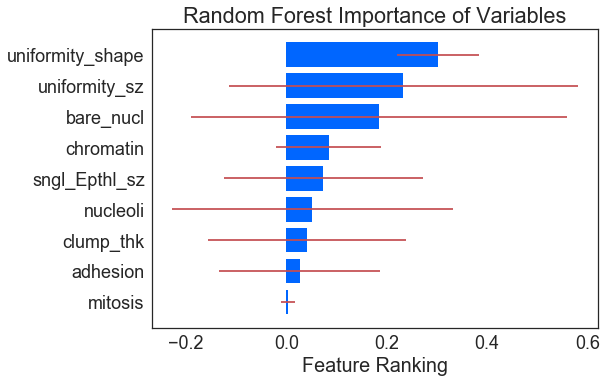

In [196]:
trgt_var=['diagns']
prdctr_vars=['clump_thk', 'uniformity_sz', 'uniformity_shape', 'adhesion',
       'sngl_Epthl_sz', 'bare_nucl', 'chromatin', 'nucleoli', 'mitosis'] # choose all attributes as predictors

model= RandomForestClassifier(n_estimators=100, class_weight='balanced', min_samples_leaf=5)
VarsOut=Model_fit_predict(d_train, d_test, prdctr_vars, trgt_var, model,1)

See how things change using SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
# using DOW + dow ; rather than dow and am_pm seperately
cols_ls=['diagns','clump_thk', 'uniformity_sz', 'uniformity_shape', 'adhesion',
       'sngl_Epthl_sz', 'bare_nucl', 'chromatin', 'nucleoli', 'mitosis'] # 'sz'
bkSub=dat[cols_ls]

bkSubC=bkSub.dropna() # make sure no na

In [30]:
d_train, d_test=train_test_split(bkSubC, test_size=0.3, random_state=42)

In [31]:
sm = SMOTE(random_state=42)

bkSubD=bkSubC
data= bkSubD.reindex(np.arange(len(bkSubD.diagns)))

colsIn=['diagns','clump_thk', 'uniformity_sz', 'uniformity_shape', 'adhesion',
       'sngl_Epthl_sz', 'bare_nucl', 'chromatin', 'nucleoli', 'mitosis'] 
data=data[colsIn]
data=data.dropna()

X = data.ix[:, data.columns != 'diagns']
y = data.ix[:, data.columns == 'diagns']
y=np.asarray(y).ravel()

X_res, y_res = sm.fit_sample(X, y)

# make sure it is 50- 50
np.count_nonzero(y_res)/len(y_res)

0.5

...... hummmm all scores 1 ? Too good to be true...

Model F1-score: 1.0
Model Accuracy: 1.0
Model Precision: 1.0
Model Recall: 1.0

Cross Validation (mean score, variance): 0.973, 0.014


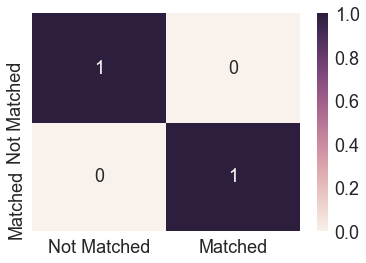

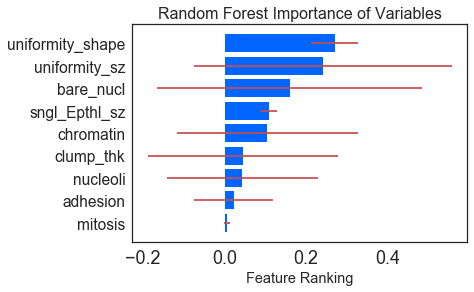

In [32]:
model= RandomForestClassifier(n_estimators=100)
VarsOut=Model_fit_predict_SMOTE(X_res,y_res, d_test, colsIn[1:], 'diagns',model)